<a href="https://colab.research.google.com/github/alluabhishek/Stock-Price-Prediction---ARIMA-LSTM/blob/main/Stock_Price_Prediction_ARIMA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1098699964.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261045  24.729268  23.821670  24.718172  212818400
2015-01-05  23.577579  24.110156  23.391179  24.030269  257142000
2015-01-06  23.579788  23.839418  23.218079  23.641922  263188400
2015-01-07  23.910431  24.010288  23.677428  23.788382  160423600
2015-01-08  24.829132  24.886828  24.121249  24.238861  237458000


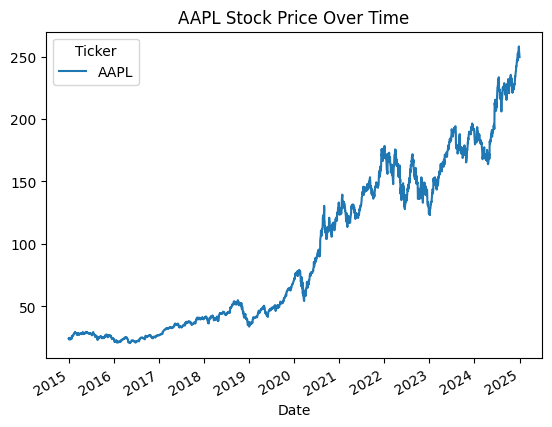

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf # Library for fetching stock data
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the stock and date range
TICKER = 'AAPL'
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'

# Download the data
data = yf.download(TICKER, start=START_DATE, end=END_DATE)

# Display the first few rows and a quick plot
print(data.head())
data['Close'].plot(title=f'{TICKER} Stock Price Over Time')
plt.show()

In [2]:
# Use only the 'Close' price for prediction
data_close = data['Close'].values.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)

# Define the look-back period (how many days to look back for prediction)
LOOK_BACK = 60

# Function to create sequences (X) and labels (Y) for LSTM
def create_dataset(dataset, look_back=LOOK_BACK):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        # Current sequence for the look_back period
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        # The price on the day after the sequence ends
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split data into training and testing sets
TRAIN_SIZE = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:TRAIN_SIZE, :]
test_data = scaled_data[TRAIN_SIZE:len(scaled_data), :]

# Create training and testing sequences
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape input to be [samples, time steps, features] - required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1952, 60, 1)
X_test shape: (444, 60, 1)


In [3]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(LOOK_BACK, 1)))
model.add(Dropout(0.2)) # Dropout helps prevent overfitting

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer predicting the next single price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# NOTE: Training can take a few minutes on a free Colab GPU
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train,
    y_train,
    epochs=25, # Number of passes over the training data
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n--- Training Complete ---")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Starting Model Training ---
Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0220 - val_loss: 0.0023
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 9.9287e-04 - val_loss: 0.0014
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 9.3501e-04 - val_loss: 0.0015
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 9.7407e-04 - val_loss: 0.0020
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 8.9148e-04 - val_loss: 0.0045
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 9.1574e-04 - val_loss: 0.0020
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 8.8723e-04 - val_loss: 0.0028
Epoch

In [4]:
# Import necessary libraries (if not already done)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming LOOK_BACK is defined (e.g., 60) and X_train/X_test are reshaped

# Build the DEEPER LSTM model
model = Sequential()

# Layer 1: Must set return_sequences=True
model.add(LSTM(units=100, return_sequences=True, input_shape=(LOOK_BACK, 1)))
model.add(Dropout(0.3)) # Increased dropout for deeper models

# Layer 2: Must set return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

# Layer 3: Must set return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

# Layer 4: The final LSTM layer - return_sequences is FALSE by default (or omitted)
model.add(LSTM(units=100))
model.add(Dropout(0.3))

# Output layer predicting the next single price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model structure
model.summary()

# Train the model
print("\n--- Starting Deep Model Training ---")
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Increasing epochs is common for deeper models
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n--- Deep Model Training Complete ---")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Deep Model Training ---
Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - loss: 0.0197 - val_loss: 0.0029
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - loss: 0.0016 - val_loss: 0.0097
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 396ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 367ms/step - loss: 9.7103e-04 - val_loss: 0.0012
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 352ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - loss: 9.5336e-04 - val_loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


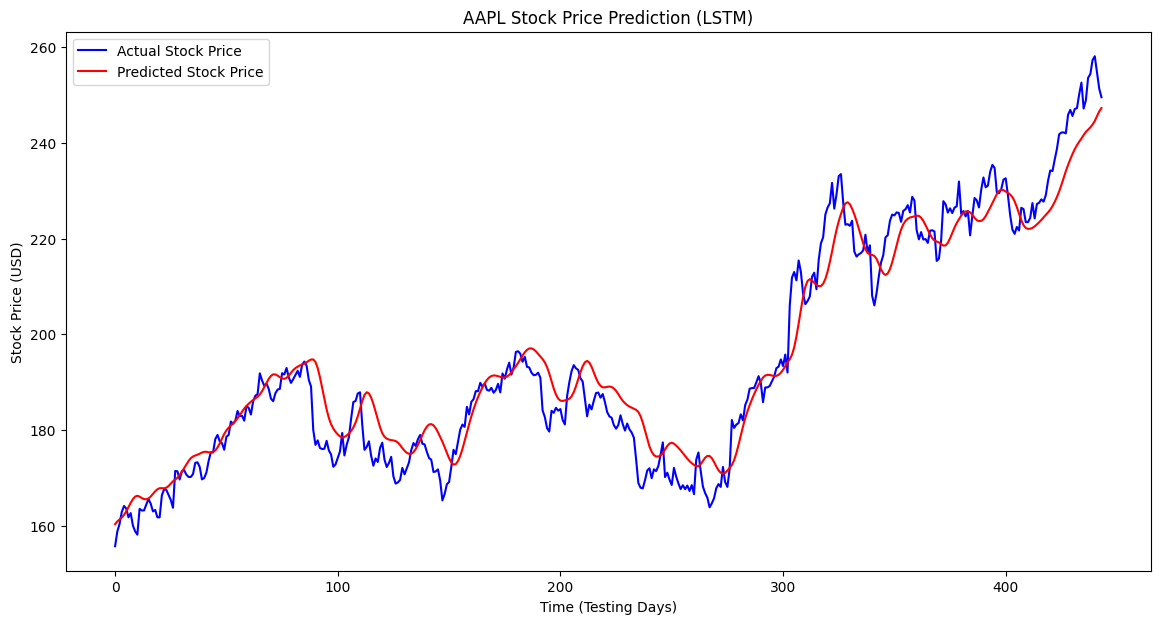


Root Mean Squared Error (RMSE): $5.90


In [5]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions and true values back to actual prices
predictions = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_unscaled, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{TICKER} Stock Price Prediction (LSTM)')
plt.xlabel('Time (Testing Days)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Calculate Root Mean Squared Error (RMSE) for evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions))
print(f"\nRoot Mean Squared Error (RMSE): ${rmse:.2f}")